# Diving into the data of Fantasy Premier League

### Importing all the necessary packages and libraries

In [99]:
import requests
import pandas as pd
import numpy as np
import json
from IPython.display import display, Image
import pandas as pd
import fuzzywuzzy
import warnings

In [4]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

All of the data available on FPL site can be accessed via an API that they provide. Let's see how it looks like

In [5]:
# Make a request to GET the data from the FPL API
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)

# Convert JSON data to a python object
data = json.loads(response.text)

data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

Each key of the dictionary is responsible for storing some kind of data for FPL. Let's dive into some of them

## Exploring 'elements' dataset - dataset storing data for all players

In [6]:
# Create pandas DataFrame from JSON player data
player_dataset = pd.DataFrame.from_dict(data['elements'])

display(player_dataset.shape)
display(player_dataset.head())
player_dataset.columns

(701, 88)

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.5,False,None,u,1,3,0,10024,0,35127,2981,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,498,44,488,50,458,47,507,48,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,539,86,522,52,523,52,219,39,0.0,0.0
1,NaN,NaN,58822,0,0,0,0,0,2,0.5,0.0,0,Cédric,0.0,2,False,,None,40,58822.jpg,0.0,Alves Soares,0.3,False,None,a,1,3,0,4552,182,11627,231,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,359,131,346,129,305,106,369,132,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,588,161,383,131,383,131,254,97,0.0,0.0
2,0.0,0.0,153256,0,0,-1,1,0,3,0.0,0.0,0,Mohamed,0.0,3,False,Knee injury - Unknown return date,2023-08-11T13:00:06.079379Z,44,153256.jpg,0.0,Elneny,0.1,False,None,i,1,3,0,3091,23,7680,129,0.0,0.0,M.Elneny,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,478,166,468,167,433,155,487,171,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,512,267,502,182,503,182,445,147,0.0,0.0
3,NaN,NaN,438098,0,0,-1,1,0,3,2.3,1.8,0,Fábio,1.8,4,False,,None,54,438098.jpg,7.0,Ferreira Vieira,0.1,False,None,a,1,3,7,2656,86,4923,95,0.3,1.3,Fábio Vieira,34,0,2,0,1,0,0,0,0,0,0,0,22,23.0,15.3,25.0,6.3,0,0.04,0.22,0.26,0.25,220,87,181,105,119,70,202,94,NaN,,NaN,,NaN,,0.11,0.0,0.58,0.69,0.66,2.65,146,92,170,76,12,8,399,125,0.0,0.0
4,NaN,NaN,226597,0,0,-2,2,0,2,1.0,0.5,0,Gabriel,0.5,5,False,,None,48,226597.jpg,1.0,dos Santos Magalhães,15.1,False,None,a,1,3,2,113722,1876,1572249,19755,0.1,0.4,Gabriel,24,0,0,0,0,0,0,0,0,0,0,0,7,13.2,0.0,0.0,1.3,0,0.00,0.00,0.00,0.75,258,103,600,223,588,222,319,113,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,2.81,0.00,320,34,309,106,306,110,25,6,0.0,0.0


Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

### Exploring players dataset columns based on comparison with FPL page

We can see that there are loots of columns so let's do a subset of them! To understand all of them I took 3 players and compared the values in the dataset with the one on FPL page.

In [7]:
player_dataset.loc[(player_dataset['first_name'].isin(['Bukayo','Mohamed', 'Erling']))& (player_dataset['second_name'].isin(['Saka','Salah', 'Haaland'])),]

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
18,NaN,NaN,223340,0,0,2,-2,1,3,5.7,5.2,0,Bukayo,5.2,19,False,,None,87,223340.jpg,7.0,Saka,66.2,False,None,a,1,3,21,837723,11775,256534,8751,0.6,2.4,Saka,268,2,0,1,3,0,0,0,0,0,0,4,78,115.4,139.7,134.0,38.9,3,1.71,1.36,3.07,2.51,12,6,10,9,5,2,1,1,1.0,,NaN,,1.0,,0.57,0.0,0.46,1.03,0.84,1.01,7,5,23,12,13,9,2,1,1.01,0.34
370,NaN,NaN,118748,0,0,0,0,0,3,4.3,4.3,0,Mohamed,3.8,308,False,,None,125,118748.jpg,5.0,Salah,25.9,False,None,a,11,14,15,389579,4612,590421,16805,0.3,1.2,Salah,251,1,2,0,3,0,0,1,0,0,0,0,49,86.6,78.1,107.0,27.2,3,1.69,0.54,2.23,4.28,33,15,30,19,15,8,19,15,NaN,,2.0,,2.0,,0.61,0.0,0.19,0.80,1.53,1.08,3,1,60,26,43,21,13,5,1.08,0.00
434,NaN,NaN,223094,0,0,0,0,2,4,10.0,10.0,17,Erling,9.0,355,True,,None,140,223094.jpg,9.0,Haaland,91.5,False,None,a,13,43,36,319833,13696,83109,1476,0.6,2.6,Haaland,349,6,1,2,2,0,0,1,0,0,0,3,161,105.0,48.4,193.0,34.6,4,4.54,0.18,4.72,2.70,23,1,73,5,1,1,6,2,NaN,,NaN,,1.0,,1.17,0.0,0.05,1.22,0.70,0.52,1,1,1,1,1,1,1,1,1.03,0.52


Now let's create a dictionary of relevant columns with keys as the column names and values as a short description of them! Just in case I forget what some of them mean.

In [8]:
#based on this the relevant columns are
relevant_columns_description={
    'cost_change_start':'price change since start',
    'dreamteam_count':'nr of times in dreamteam',
    'element_type':'position in game',
    'event_points':'points in last gameweek',
    'first_name':'first name',
    'form':'form',
    'in_dreamteam':'whether in current dreamteam',
    'now_cost':'current price *10',
    'points_per_game': 'points per game',
    'second_name': 'second name',
    'selected_by_percent': 'selected by percent',
    'team':'team nr based on alphabetical order',
    #'team_code':'team code ???',
    'total_points': 'total points',
    'transfers_in': 'total transfers in',
    'transfers_in_event': 'transfers in this gameweek',
    'transfers_out': 'total transfers out',
    'transfers_out_event': 'transfers out this gameweek',
    'value_form':'form / value rounded',
    'value_season':'total points / value rounded',
    'minutes':'minutes',
    'goals_scored': 'goals scored',
    'assists': 'assists',
    'clean_sheets': 'clean sheets',
    'goals_conceded': 'goals conceded',
    'own_goals': 'own goals',
    'penalties_saved': 'penalties saved',
    'penalties_missed': 'penalties missed',
    'yellow_cards': 'yellow cards',
    'red_cards': 'red cards',
    'bonus':'total bonus points (fpl points)',
    'bps':'total bonus points',
    'influence':'total influence metric',
    'creativity':'total creativity metric',
    'threat':'total threat metric',
    'ict_index':'total ict index',
    'starts':'starts',
    'expected_goals':'total expected goals',
    'expected_assists':'total expected assists',
    'expected_goal_involvements':'total expected goal involvements',
    'expected_goals_conceded':'total expected goals conceded',
    'influence_rank':'rank for influence across all positions',
    #'influence_rank_type':'something with position???',
    'creativity_rank':'rank for creativity across all positions',
    #'creativity_rank_type':'something with position???',
    'threat_rank':'rank for threat across all positions',
    #'threat_rank_type':'something with position???',
    'ict_index_rank':'rank for ict index across all positions',
    #'ict_index_rank_type':'something with position???',
    'corners_and_indirect_freekicks_order':'corners and indirect freekicks order, not complete',
    'direct_freekicks_order':'direct freekicks order, not complete',
    'penalties_order':'penalties order, not complete',
    'expected_goals_per_90':'expected goals per_90',
    'saves_per_90':'saves per 90',
    'expected_assists_per_90':'expected assists per 90',
    'expected_goal_involvements_per_90':'expected goal involvements per 90',
    'expected_goals_conceded_per_90':'expected goals conceded per 90',
    'goals_conceded_per_90':'goals conceded per 90',
    'now_cost_rank':'rank for price across all positions',
    #'now_cost_rank_type':'something with position???',
    'form_rank':'rank for form across all positions',
    #'form_rank_type':'something with position???',
    'points_per_game_rank':'rank for points across all positions',
    #'points_per_game_rank_type':'something with position???',
    'selected_rank':'rank for selected across all positions',
    #'selected_rank_type':'something with position???',
    #'starts_per_90':'???',
    'clean_sheets_per_90':'amount of minutes on pitch with clean sheet / amount of minutes on pitch',
    'id':'id'
}

Now let's be sure that we didn't omit any important columns and quickly dive into the rest of them.

In [9]:
print(len(relevant_columns_description.keys()), ' - # of columns relevant and already analyzed')

remaining_columns = list(set(player_dataset.columns).difference(relevant_columns_description.keys()))
print(len(remaining_columns), '- all looks fine')

for el in remaining_columns:
    print(player_dataset[el].value_counts(dropna=False).head())
#quickly analyzing all these columns i guess they dont make sense so can be dropped

59  - # of columns relevant and already analyzed
29 - all looks fine
48    4
69    4
84    4
20    4
64    4
Name: ict_index_rank_type, dtype: int64
52    4
50    4
16    4
32    4
46    4
Name: points_per_game_rank_type, dtype: int64
NaN      440
0.0      175
100.0     60
75.0      13
25.0       9
Name: chance_of_playing_this_round, dtype: int64
232223    1
221820    1
493105    1
465527    1
21205     1
Name: code, dtype: int64
 0    681
 1     18
-1      2
Name: cost_change_event_fall, dtype: int64
55    4
3     4
81    4
23    4
82    4
Name: now_cost_rank_type, dtype: int64
None    701
Name: squad_number, dtype: int64
a    497
u    118
i     65
d     19
s      2
Name: status, dtype: int64
50    4
74    4
35    4
69    4
14    4
Name: creativity_rank_type, dtype: int64
0.00    419
1.00     94
1.03     10
1.08      9
1.07      8
Name: starts_per_90, dtype: int64
 0    681
-1     18
 1      2
Name: cost_change_event, dtype: int64
None                           424
2023-08-07T17:30:06

### Removing the unnecessary columns for players dataset

In [10]:
player_dataset.drop(remaining_columns, axis=1, inplace=True)

## Exploring the 'teams' dataset - dataset storing data for all the teams

In [11]:
teams_dataset = pd.DataFrame.from_dict(data['teams'])

display(teams_dataset.head())
display(teams_dataset.columns)
display(teams_dataset.shape)

#- every row for a club
#- should merge on id

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1230,1285,1250,1250,1210,1320,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1115,1175,1130,1190,1100,1160,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,3,None,False,0,1060,1095,1050,1100,1060,1090,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1125,1205,1120,1220,1130,1190,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1165,1210,1120,1200,1210,1240,131


Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

(20, 21)

Once again we can do a subset for only the interesting columns.

In [12]:
relevant_columns_description_teams = ['id', 'name', 'short_name', 'strength', 'strength_overall_home', 'strength_overall_away', \
                                      'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away']

#subset for relevant columns
teams_dataset = teams_dataset[relevant_columns_description_teams]

teams_dataset.head()

,id,name,short_name,strength,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away
0,1,Arsenal,ARS,4,1230,1285,1250,1250,1210,1320
1,2,Aston Villa,AVL,3,1115,1175,1130,1190,1100,1160
2,3,Bournemouth,BOU,3,1060,1095,1050,1100,1060,1090
3,4,Brentford,BRE,3,1125,1205,1120,1220,1130,1190
4,5,Brighton,BHA,3,1165,1210,1120,1200,1210,1240


## Exploring the 'events' dataset - dataset storing data for every gameweek of FPL game

In [13]:
events_dataset = pd.DataFrame.from_dict(data['events'])

display(events_dataset.head())
display(events_dataset.columns)
display(events_dataset.shape)
#each row for each gameweek

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2023-08-11T17:30:00Z,64,True,True,3383750.0,1691775000,0,127.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 163222}...",355.0,1.0,395.0,"{'id': 395, 'points': 14}",0,355.0,19.0
1,2,Gameweek 2,2023-08-18T17:15:00Z,44,True,True,3338487.0,1692378900,0,120.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 126778}...",355.0,195.0,108.0,"{'id': 108, 'points': 16}",13130353,355.0,19.0
2,3,Gameweek 3,2023-08-25T17:30:00Z,44,True,True,9368956.0,1692984600,0,128.0,True,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 124110}...",355.0,108.0,216.0,"{'id': 216, 'points': 19}",17619532,355.0,19.0
3,4,Gameweek 4,2023-09-01T17:30:00Z,47,False,False,9429150.0,1693589400,0,123.0,False,True,False,True,True,"[{'chip_name': 'bboost', 'num_played': 109196}...",355.0,216.0,516.0,"{'id': 516, 'points': 17}",16035365,355.0,19.0
4,5,Gameweek 5,2023-09-16T10:00:00Z,0,False,False,NaN,1694858400,0,NaN,False,False,True,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN


Index(['id', 'name', 'deadline_time', 'average_entry_score', 'finished',
       'data_checked', 'highest_scoring_entry', 'deadline_time_epoch',
       'deadline_time_game_offset', 'highest_score', 'is_previous',
       'is_current', 'is_next', 'cup_leagues_created',
       'h2h_ko_matches_created', 'chip_plays', 'most_selected',
       'most_transferred_in', 'top_element', 'top_element_info',
       'transfers_made', 'most_captained', 'most_vice_captained'],
      dtype='object')

(38, 23)

Interesting dataset, will be used for some analysis for sure.

## Exploring rest of the datasets

In [14]:
element_stats_dataset = pd.DataFrame.from_dict(data['element_stats'])
display(element_stats_dataset.head())

element_types_dataset = pd.DataFrame.from_dict(data['element_types'])
display(element_types_dataset.head())

phases_dataset = pd.DataFrame.from_dict(data['phases'])
phases_dataset.head()

#the rest of the elements dont work but actually we dont need them, not sure we need this ones either

,label,name
0,Minutes played,minutes
1,Goals scored,goals_scored
2,Assists,assists
3,Clean sheets,clean_sheets
4,Goals conceded,goals_conceded


,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],84
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],228
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],300
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],89


,id,name,start_event,stop_event
0,1,Overall,1,38
1,2,August,1,3
2,3,September,4,7
3,4,October,8,10
4,5,November,11,13


From here only the 'element_types' dataset looks interesting and we will use it later for sure!

## Joining the datasets

Since the data is a little bit split into separate dataframes, let's merge it together so we have all information in one place!

In [15]:
# join player positions
final_dataset = player_dataset.merge(
    teams_dataset,
    left_on='team',
    right_on='id',
    suffixes =['_player','_team']
).merge(
    element_types_dataset,
    left_on='element_type',
    right_on='id'
)

# rename columns
final_dataset = final_dataset.rename(
    columns={'name':'team_name', 'singular_name':'position_name', 'id': 'id_position'}
)

## Get gameweek history & season history for each player

Since we already have all players in one dataframe, let’s get data on a per-player basis!

In [16]:
base_url = 'https://fantasy.premierleague.com/api/'



def get_player_id(player):
    '''get player id for a given player based on full name'''

    from fuzzywuzzy import fuzz, process

    first_name, second_name = player.split()
    first_name = process.extractOne(first_name, player_dataset['first_name'])[0]
    second_name = process.extractOne(second_name, player_dataset['second_name'])[0]

    player_id = final_dataset.loc[(final_dataset['first_name'].isin([first_name])) & (final_dataset['second_name'].isin([second_name])), 'id_player'].values[0]

    return player_id





def get_gameweek_history(player):
    '''get all gameweek info for a given player based on full name'''

    player_id = get_player_id(player)

    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/').json()
    
    df = pd.json_normalize(r['history'])
    
    return df





def get_season_history(player):
    '''get all past season info for a given player based on full name'''

    player_id = get_player_id(player)

    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/').json()
    
    df = pd.json_normalize(r['history_past'])
    
    return df


In [17]:
get_season_history('Matty Cash')

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,2020/21,199796,50,50,89,2373,0,2,11,35,0,0,0,6,1,0,8,468,520.8,352.9,110.0,98.7,0,0.00,0.00,0.00,0.00
1,2021/22,199796,50,53,147,3377,4,3,13,50,0,0,0,8,0,0,11,623,754.8,432.1,534.0,172.1,0,0.00,0.00,0.00,0.00
2,2022/23,199796,50,46,57,1817,0,2,4,29,0,0,0,4,0,0,3,311,303.0,178.3,67.0,54.9,20,0.20,0.95,1.15,27.14


# First plot - sum all points gathered for each team this season

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
#this is in alphabetical order
premier_league_colors = [
    ("Arsenal FC", "#EF0107"),
    ("Aston Villa FC", "#770A0A"),
    ("Bournemouth FC", "#DA020E"),
    ("Brentford FC", "#F20603"),
    ("Brighton & Hove Albion FC", "#0057B8"),
    ("Burnley FC", "#A52A2A"),
    ("Chelsea FC", "#034694"),
    ("Crystal Palace FC", "#E03A3E"),
    ("Everton FC", "#003399"),
    ("Fulham FC", "#000000"),
    ("Liverpool FC", "#C8102E"),
    ("Luton FC", "#FFA41C"),
    ("Manchester City FC", "#6CAEE0"),
    ("Manchester United FC", "#DA020E"),
    ("Newcastle United FC", "#000000"),
    ("Nott'm Forest FC", "#DC143C"),
    ("Sheffield United FC", "#EE2737"),
    ("Tottenham Hotspur FC", "#001C58"),
    ("West Ham United FC", "#7A263A"),
    ("Wolverhampton Wanderers FC", "#FFD100"),
]

colors = [tup[1] for tup in premier_league_colors]



position_colors = {
    "Goalkeeper": "#F1C40F",
    "Defender": "#3498DB",
    "Midfielder": "#27AE60",
    "Forward": "#FF5733"
}

['#F1C40F', '#3498DB', '#27AE60', '#FF5733']

In [85]:
def barplot_fplpoints_per_club():
    plt.figure(figsize=(20, 8))

    fpl_points_per_club = final_dataset.groupby('team_name')['total_points'].sum()

    sns.barplot(x=fpl_points_per_club.index, y=fpl_points_per_club.values, palette = colors)
    for i in range(50, max(fpl_points_per_club.values)+1, 50):
        plt.axhline(i, color='gray', linestyle='--', zorder = 0)
    
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel('Teams', fontsize=15)
    plt.ylabel('Points attained all season', fontsize=15)
    plt.title('Points attained all season for each club', fontsize=18)
    plt.show()

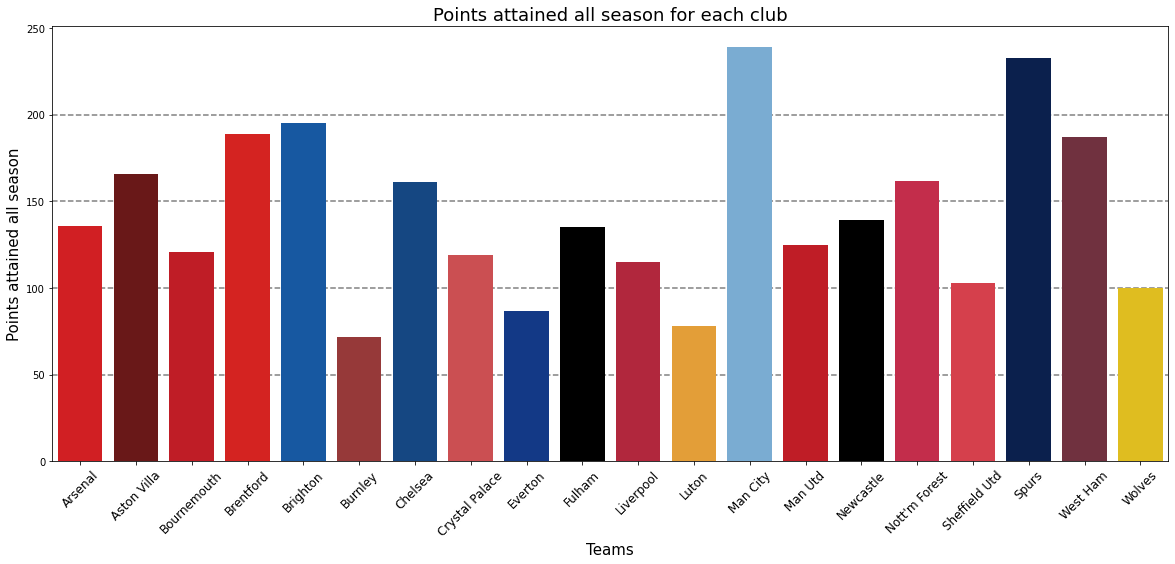

In [86]:
barplot_fplpoints_per_club()

In [94]:
def barplot_fplpoints_per_position():
    plt.figure(figsize=(20, 8))

    played_already = final_dataset[final_dataset['total_points'] >= 1]
    df = played_already.groupby('position_name')['total_points'].agg(['sum', 'mean', 'count'])

    sns.barplot(x=fpl_points_per_position.index, y=fpl_points_per_position.values, palette = list(position_colors.values()))
    for i in range(400, max(fpl_points_per_position.values)+1, 400):
        plt.axhline(i, color='gray', linestyle='--', zorder = 0)
    
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel('Positions', fontsize=15)
    plt.ylabel('Points attained all season', fontsize=15)
    plt.title('Points attained all season per position', fontsize=18)
    plt.show()

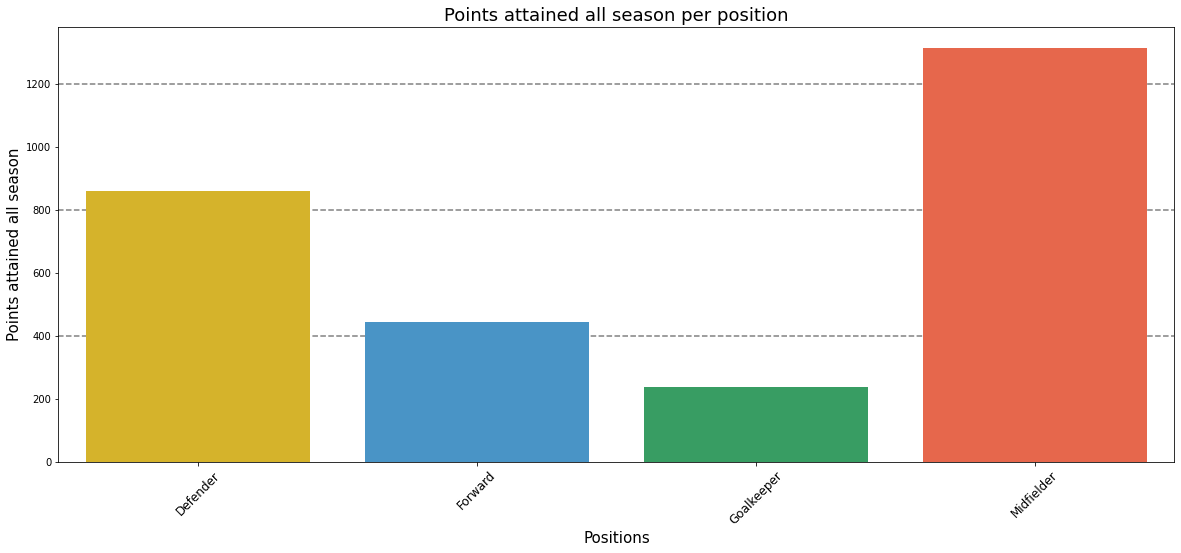

In [95]:
barplot_fplpoints_per_position()

In [108]:
played_already = final_dataset[final_dataset['total_points'] >= 1]
df = played_already.groupby('position_name')['total_points'].agg(['sum', 'mean', 'count'])

In [116]:
df

,sum,mean,count
position_name,,,
Defender,863,6.742188,128
Forward,445,9.081633,49
Goalkeeper,240,10.909091,22
Midfielder,1318,7.574713,174


In [117]:
#Change order of df so goalkeeper first, then add count to xlabel and mean inside the barplots probably